In [242]:
from pandas import read_csv, DataFrame, Series, crosstab, isnull
import copy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.tools import FigureFactory as FF
import plotly.plotly as py
from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import norm, logistic, lognorm, t as stud
%matplotlib inline

##  1. Считываем данные на фондовом рынке Франции за период 01.01.2010-31.12.2014

Данные по ценам активов:

In [271]:
datasetPrice = read_csv('adj_close.csv',';', index_col=['Date'], parse_dates=['Date'], dayfirst=True)
datasetPrice.head()

,AC.PA,ACA.PA,AI.PA,AIR.PA,BN.PA,BNP.PA,CA.PA,CAP.PA,CS.PA,DG.PA,...,RI.PA,RNO.PA,SAF.PA,SAN.PA,SOLB.BR,SU.PA,SW.PA,UG.PA,VIE.PA,VIV.PA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,22.326075,9.936727,44.880932,12.437354,35.031097,42.603958,26.818718,27.799234,10.889270,29.339161,...,52.735519,31.505499,11.785363,21.312815,54.090031,31.318687,33.044453,16.205883,15.410857,11.861494
2010-01-05,22.188324,10.087811,43.983288,12.397347,34.727150,42.522087,27.453690,28.145164,11.070760,29.563007,...,51.452454,31.596220,12.354868,21.031145,53.833641,31.166748,33.077202,16.347960,15.529656,11.858687
2010-01-06,21.924225,10.266012,43.712418,12.508475,34.723091,42.589073,27.252544,28.703653,11.184188,29.970345,...,52.015957,32.371490,12.282618,20.910971,53.833641,30.847675,34.395546,17.392019,15.757351,11.731255
2010-01-07,21.700371,10.269888,43.659271,12.632939,34.650150,43.333370,26.944921,28.403566,11.057795,29.981358,...,51.461124,32.738499,12.244366,21.016123,54.681011,30.786898,33.417027,17.646420,15.942149,11.695245
2010-01-08,21.714706,10.436467,43.797356,12.757401,34.569092,44.360512,27.209162,28.524437,11.093445,30.407036,...,51.071003,32.482826,12.354868,20.899704,53.919102,30.509598,33.519379,17.514231,16.565845,11.556762


In [272]:
datasetPrice.shape

(1276, 30)

In [273]:
datasetPrice.describe()

,AC.PA,ACA.PA,AI.PA,AIR.PA,BN.PA,BNP.PA,CA.PA,CAP.PA,CS.PA,DG.PA,...,RI.PA,RNO.PA,SAF.PA,SAN.PA,SOLB.BR,SU.PA,SW.PA,UG.PA,VIE.PA,VIV.PA
count,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,...,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
mean,25.987942,7.146238,62.725731,28.979958,43.543196,37.767989,21.780235,35.002235,11.094630,33.551457,...,70.836349,39.281074,29.885351,13.403776,75.259803,46.021186,54.262496,11.136112,10.943913,12.130873
std,5.231069,2.320408,10.252059,12.387847,5.366044,7.798716,5.564915,9.445916,3.199436,6.759104,...,12.672008,13.177297,11.260428,4.765469,17.350663,9.579723,12.071115,5.031119,3.373273,1.933386
min,14.740197,2.453026,40.058216,12.046185,32.518452,18.413811,11.457040,19.664928,5.744314,22.738289,...,47.967388,18.561289,11.785363,8.600596,47.332249,27.444208,31.914444,3.546086,5.789892,7.996094
25%,22.168917,5.138842,55.125683,18.518492,38.812903,32.953630,16.502656,28.570632,8.684199,28.451983,...,58.360450,28.940970,21.163890,9.964772,58.042682,37.689538,43.516911,7.283552,7.705448,10.737478
50%,24.873548,7.582931,61.556273,24.859544,43.580061,39.317871,23.039750,32.079523,10.077954,31.245798,...,74.416519,33.809105,25.419647,12.569015,73.553147,45.994659,53.655653,10.123371,10.973292,11.713642
75%,29.796030,9.260614,70.906448,41.325081,48.080058,43.323234,25.936340,41.488922,14.788000,37.795971,...,81.784714,52.826057,41.731710,14.469533,91.732719,54.695770,65.621822,14.632352,14.079251,13.225922
max,37.531532,10.633248,84.561203,52.870171,54.371136,52.604595,33.578175,58.802635,17.378040,51.466663,...,92.988144,67.248665,51.054699,52.608360,109.127022,66.327309,76.218895,22.400208,17.301737,16.813686


Данные по объемам продаж:

In [274]:
dataVol = read_csv('volume.csv',';', index_col=['Date'], parse_dates=['Date'], dayfirst=True)
dataVol.head()

,AC.PA,ACA.PA,AI.PA,AIR.PA,BN.PA,BNP.PA,CA.PA,CAP.PA,CS.PA,DG.PA,...,RI.PA,RNO.PA,SAF.PA,SAN.PA,SOLB.BR,SU.PA,SW.PA,UG.PA,VIE.PA,VIV.PA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,868105.0,5879617.0,839670.0,2496013.0,3685834.0,2334481.0,1659399.0,1115411.0,6110711.0,1881645.0,...,384099.0,3178864.0,362251.0,6099206.0,396050.0,3656756.0,1067418.0,2081839.0,2871222.0,5081848.0
2010-01-05,1864574.0,6928587.0,1465477.0,2700340.0,1947279.0,3158216.0,4031419.0,2231636.0,7390494.0,1404291.0,...,629204.0,2444195.0,2373924.0,2773347.0,278062.0,3665156.0,1487612.0,1942511.0,3571464.0,7971009.0
2010-01-06,3764554.0,5290631.0,2179169.0,3993940.0,1524936.0,1773871.0,3717000.0,3497666.0,5059701.0,3218732.0,...,1430154.0,4955904.0,1461508.0,2623904.0,140492.0,1688460.0,1190899.0,6759012.0,4590526.0,3481698.0
2010-01-07,1365276.0,5328586.0,1834564.0,4633114.0,3877964.0,6037338.0,2221203.0,2535546.0,6003474.0,2716856.0,...,1185508.0,2381513.0,1284086.0,2776263.0,587629.0,3723944.0,1564400.0,6877388.0,4553388.0,6902272.0
2010-01-08,1108050.0,7160295.0,840778.0,2289556.0,2209968.0,4284507.0,1829339.0,1310799.0,7242533.0,2178841.0,...,813818.0,2630329.0,1015354.0,2659970.0,253349.0,2191678.0,331861.0,2670919.0,5492414.0,6389823.0


In [275]:
dataVol.shape

(1276, 30)

In [276]:
dataVol.describe()

,AC.PA,ACA.PA,AI.PA,AIR.PA,BN.PA,BNP.PA,CA.PA,CAP.PA,CS.PA,DG.PA,...,RI.PA,RNO.PA,SAF.PA,SAN.PA,SOLB.BR,SU.PA,SW.PA,UG.PA,VIE.PA,VIV.PA
count,1.276000e+03,1.276000e+03,1.276000e+03,1.276000e+03,1.276000e+03,1.276000e+03,1.276000e+03,1.276000e+03,1.276000e+03,1.276000e+03,...,1.276000e+03,1.276000e+03,1.276000e+03,1.276000e+03,1.276000e+03,1.276000e+03,1.276000e+03,1.276000e+03,1.276000e+03,1.276000e+03
mean,1.000893e+06,1.031589e+07,1.095574e+06,2.495995e+06,2.006450e+06,5.330821e+06,3.190768e+06,9.660952e+05,8.801370e+06,1.999827e+06,...,6.521367e+05,1.732080e+06,9.904668e+05,4.621307e+05,2.424466e+05,1.893234e+06,2.614512e+05,4.667781e+06,2.869982e+06,5.249649e+06
std,5.129580e+05,6.502176e+06,4.940508e+05,1.724070e+06,9.244300e+05,2.819685e+06,1.924918e+06,5.477502e+05,4.389116e+06,9.147414e+05,...,3.276826e+05,9.591936e+05,5.910638e+05,1.345250e+06,1.381351e+05,8.894433e+05,1.630963e+05,3.271948e+06,1.715944e+06,2.466671e+06
min,6.744400e+04,6.897540e+05,1.218870e+05,2.634560e+05,2.027320e+05,5.093350e+05,3.589740e+05,9.294700e+04,5.649910e+05,1.925800e+05,...,9.072400e+04,7.194100e+04,9.832700e+04,0.000000e+00,1.245100e+04,1.911460e+05,1.647400e+04,3.107060e+05,4.254910e+05,2.118000e+03
25%,6.544120e+05,5.927433e+06,7.832905e+05,1.639301e+06,1.430228e+06,3.483142e+06,2.096190e+06,6.251365e+05,5.924298e+06,1.417989e+06,...,4.478125e+05,1.093718e+06,6.403512e+05,9.075000e+03,1.569622e+05,1.313692e+06,1.633442e+05,2.653864e+06,1.733928e+06,3.704132e+06
50%,8.834635e+05,8.616410e+06,1.014046e+06,2.134117e+06,1.812718e+06,4.563234e+06,2.746384e+06,8.390755e+05,7.837220e+06,1.800382e+06,...,5.834180e+05,1.546714e+06,8.567765e+05,1.715000e+04,2.122615e+05,1.700461e+06,2.169395e+05,3.713463e+06,2.461460e+06,4.781941e+06
75%,1.206822e+06,1.268914e+07,1.280932e+06,2.829287e+06,2.380113e+06,6.341780e+06,3.733171e+06,1.136036e+06,1.055332e+07,2.346518e+06,...,7.596785e+05,2.117120e+06,1.205888e+06,4.072500e+04,2.891038e+05,2.235574e+06,3.076085e+05,5.551352e+06,3.508484e+06,6.203312e+06
max,5.535228e+06,5.648092e+07,4.854700e+06,2.689999e+07,9.557007e+06,2.417537e+07,2.584730e+07,6.008405e+06,5.143024e+07,8.862701e+06,...,3.901439e+06,8.262910e+06,8.382004e+06,1.461028e+07,2.060683e+06,8.564448e+06,1.564400e+06,3.692675e+07,1.779603e+07,3.210260e+07


# 2. Преобразуем данные по ценам в данные по доходности

## используя *логарифмическую* доходность

In [277]:
def log_profitability(dataS):
    dataSNew = copy.copy(dataS)
    for column in range(0,dataS.shape[1]):
        for index in range(0,(dataS.shape[0])-1):
            dataSNew.iloc[index][column] = np.log(dataS.iloc[index+1][column]/dataS.iloc[index][column])
    dataSNew.drop(dataSNew.tail(1).index,inplace=True)
    return dataSNew

In [278]:
dataProb = log_profitability(datasetPrice)
dataProb.head()

,AC.PA,ACA.PA,AI.PA,AIR.PA,BN.PA,BNP.PA,CA.PA,CAP.PA,CS.PA,DG.PA,...,RI.PA,RNO.PA,SAF.PA,SAN.PA,SOLB.BR,SU.PA,SW.PA,UG.PA,VIE.PA,VIV.PA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,-0.006189,0.015090,-0.020203,-0.003222,-0.008714,-0.001924,0.023401,0.012367,0.016529,0.007601,...,-0.024631,0.002875,0.047192,-0.013304,-0.004751,-0.004863,0.000991,0.008729,0.007679,-0.000237
2010-01-05,-0.011974,0.017511,-0.006178,0.008924,-0.000117,0.001574,-0.007354,0.019649,0.010194,0.013685,...,0.010892,0.024241,-0.005865,-0.005730,0.000000,-0.010290,0.039083,0.061908,0.014556,-0.010804
2010-01-06,-0.010263,0.000377,-0.001217,0.009901,-0.002103,0.017325,-0.011352,-0.010510,-0.011365,0.000367,...,-0.010724,0.011274,-0.003119,0.005016,0.015618,-0.001972,-0.028862,0.014522,0.011659,-0.003074
2010-01-07,0.000660,0.016090,0.003158,0.009804,-0.002342,0.023427,0.009759,0.004246,0.003219,0.014098,...,-0.007610,-0.007840,0.008984,-0.005555,-0.014032,-0.009048,0.003058,-0.007519,0.038377,-0.011912
2010-01-08,-0.006364,-0.006330,-0.006204,0.009018,-0.001642,-0.014194,-0.015042,-0.002048,-0.005272,-0.005567,...,-0.006984,-0.004453,0.025808,0.007697,-0.019166,0.004720,-0.001222,0.005270,0.008134,0.001915


In [279]:
dataProb.shape

(1275, 30)

In [280]:
dataVol.shape

(1276, 30)

Выгружаем данные в файл

In [281]:
dataProb.to_csv(path_or_buf='dataProbability.csv', sep=';')

# 3-4. Проверка данных на значения повторной выборки из некоторого распределения

### Проведем анализ для конкретной компании

##### Анализ по доходности:

In [19]:
company = dataProb["UG.PA"]
company

Date
2010-01-04    0.008729
2010-01-05    0.061908
2010-01-06    0.014522
2010-01-07   -0.007519
2010-01-08    0.005270
2010-01-11   -0.025279
2010-01-12    0.005759
2010-01-13    0.020269
2010-01-14   -0.036863
2010-01-15    0.009875
2010-01-18   -0.005797
2010-01-19   -0.017788
2010-01-20   -0.013901
2010-01-21   -0.002003
2010-01-22   -0.024342
2010-01-25    0.020927
2010-01-26   -0.040629
2010-01-27   -0.024162
2010-01-28    0.014060
2010-01-29    0.017403
2010-02-01   -0.010656
2010-02-02    0.005655
2010-02-03   -0.045523
2010-02-04   -0.023454
2010-02-05   -0.017387
2010-02-08    0.016270
2010-02-09   -0.050568
2010-02-10   -0.038933
2010-02-11   -0.041543
2010-02-12    0.004337
                ...   
2014-11-17    0.020588
2014-11-18    0.001949
2014-11-19    0.003563
2014-11-20    0.034329
2014-11-21    0.035906
2014-11-24    0.013276
2014-11-25   -0.001985
2014-11-26    0.012343
2014-11-27    0.010737
2014-11-28    0.002424
2014-12-01   -0.020054
2014-12-02    0.016173
2014-1

In [20]:
from statsmodels.stats.diagnostic import acorr_ljungbox

C:\Users\maks_\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



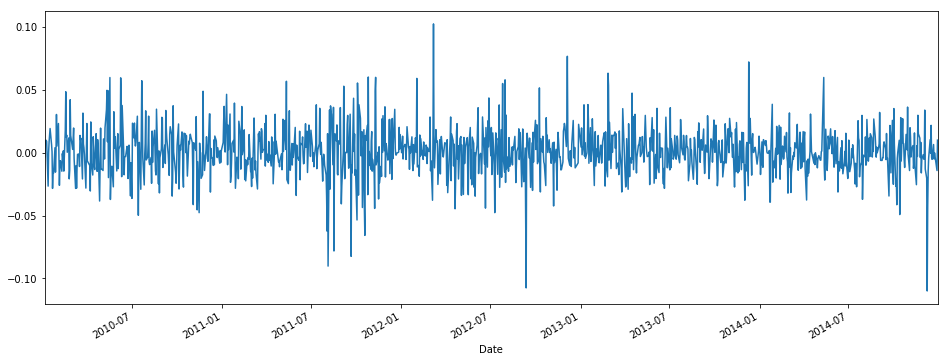

In [234]:
company.plot(figsize=(16,6))

C:\Users\maks_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).mean()



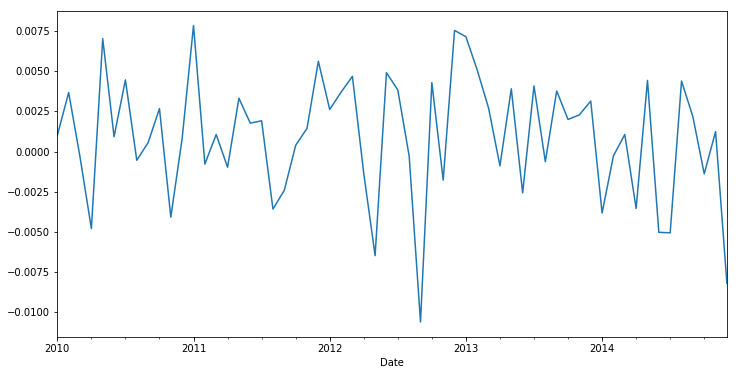

In [235]:
company.resample('m', how='mean').plot(figsize=(12,6))

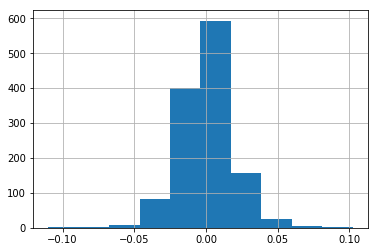

In [236]:
company.hist()

In [237]:
probByYear = DataFrame()
a = company['2010']
a.drop(a.tail(3).index,inplace=True)
probByYear['2010'] = a.values
a = company['2011']
a.drop(a.tail(4).index,inplace=True)
probByYear['2011'] = a.values
a = company['2012']
probByYear['2012'] = a.values
a = company['2013']
a.drop(a.tail(2).index,inplace=True)
probByYear['2013'] = a.values
a = company['2014']
a.drop(a.tail(1).index,inplace=True)
probByYear['2014'] = a.values
probByYear

,2010,2011,2012,2013,2014
0,-0.003222,0.008120,0.000000,0.004480,-0.002656
1,0.008924,0.025332,0.002650,0.019673,-0.017348
2,0.009901,0.036834,0.013143,-0.001625,0.008622
3,0.009804,0.003662,-0.005035,0.005675,-0.010067
4,0.009018,0.000522,0.004030,0.038070,-0.011630
5,-0.026594,0.046401,0.006614,-0.002649,0.010365
6,0.000354,0.020955,0.005578,0.007927,0.009004
7,0.008823,-0.009560,-0.005378,-0.004500,0.005720
8,0.013957,0.021925,0.004583,-0.000156,0.009580
9,0.019218,0.002407,0.020660,0.008981,0.006160


In [238]:
corr = stats.spearmanr(probByYear)
corr[0]

array([[ 1.        , -0.03162579, -0.05056166,  0.06062245,  0.16710695],
       [-0.03162579,  1.        ,  0.04775618,  0.11105076, -0.13852972],
       [-0.05056166,  0.04775618,  1.        ,  0.10387138, -0.13863487],
       [ 0.06062245,  0.11105076,  0.10387138,  1.        , -0.0117851 ],
       [ 0.16710695, -0.13852972, -0.13863487, -0.0117851 ,  1.        ]])

In [239]:
corrUniq = np.zeros(10)
corrUniq[0] = corr[0][0][1]
corrUniq[1] = corr[0][0][1]
corrUniq[2] = corr[0][0][2]
corrUniq[3] = corr[0][0][3]
corrUniq[4] = corr[0][1][2]
corrUniq[5] = corr[0][1][3]
corrUniq[6] = corr[0][1][4]
corrUniq[7] = corr[0][2][3]
corrUniq[8] = corr[0][2][4]
corrUniq[9] = corr[0][3][4]
corrUniq.mean()

-0.0079462158483598021

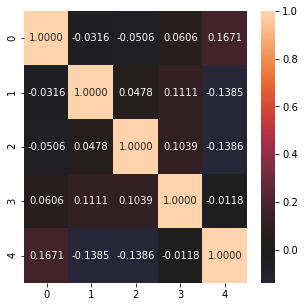

In [240]:
plt.figure(figsize = (5,5))
sns.heatmap(corr[0], annot=True, fmt=".4f", center=0);

In [241]:
corr = stats.spearmanr(probByYear)
corr[1]

array([[ 0.        ,  0.61660116,  0.4232693 ,  0.33687017,  0.00773114],
       [ 0.61660116,  0.        ,  0.44948218,  0.07788689,  0.02758263],
       [ 0.4232693 ,  0.44948218,  0.        ,  0.09925918,  0.02746388],
       [ 0.33687017,  0.07788689,  0.09925918,  0.        ,  0.85202786],
       [ 0.00773114,  0.02758263,  0.02746388,  0.85202786,  0.        ]])

In [242]:
corrUniq = np.zeros(10)
corrUniq[0] = corr[1][0][1]
corrUniq[1] = corr[1][0][1]
corrUniq[2] = corr[1][0][2]
corrUniq[3] = corr[1][0][3]
corrUniq[4] = corr[1][1][2]
corrUniq[5] = corr[1][1][3]
corrUniq[6] = corr[1][1][4]
corrUniq[7] = corr[1][2][3]
corrUniq[8] = corr[1][2][4]
corrUniq[9] = corr[1][3][4]
corrUniq.mean()

0.35270443979481653

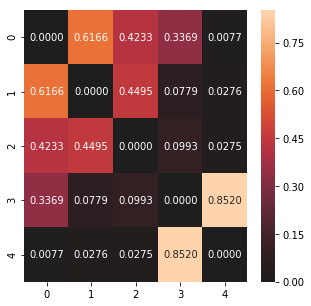

In [243]:
plt.figure(figsize = (5,5))
sns.heatmap(corr[1], annot=True, fmt=".4f", center=0);

In [244]:
statistic = np.zeros(10)
statistic[0] = stats.ks_2samp(probByYear['2010'], probByYear['2011']).statistic
statistic[1] = stats.ks_2samp(probByYear['2010'], probByYear['2012']).statistic
statistic[2] = stats.ks_2samp(probByYear['2010'], probByYear['2013']).statistic
statistic[3] = stats.ks_2samp(probByYear['2010'], probByYear['2014']).statistic
statistic[4] = stats.ks_2samp(probByYear['2011'], probByYear['2012']).statistic
statistic[5] = stats.ks_2samp(probByYear['2011'], probByYear['2013']).statistic
statistic[6] = stats.ks_2samp(probByYear['2011'], probByYear['2014']).statistic
statistic[7] = stats.ks_2samp(probByYear['2012'], probByYear['2013']).statistic
statistic[8] = stats.ks_2samp(probByYear['2012'], probByYear['2014']).statistic
statistic[9] = stats.ks_2samp(probByYear['2013'], probByYear['2014']).statistic
statistic

array([ 0.06719368,  0.06324111,  0.09486166,  0.08695652,  0.09486166,
        0.09090909,  0.12252964,  0.05533597,  0.12252964,  0.13833992])

In [245]:
statistic.mean()

0.093675889328063228

In [246]:
pvalue = np.zeros(10)
pvalue[0] = stats.ks_2samp(probByYear['2010'], probByYear['2011']).pvalue
pvalue[1] = stats.ks_2samp(probByYear['2010'], probByYear['2012']).pvalue
pvalue[2] = stats.ks_2samp(probByYear['2010'], probByYear['2013']).pvalue
pvalue[3] = stats.ks_2samp(probByYear['2010'], probByYear['2014']).pvalue
pvalue[4] = stats.ks_2samp(probByYear['2011'], probByYear['2012']).pvalue
pvalue[5] = stats.ks_2samp(probByYear['2011'], probByYear['2013']).pvalue
pvalue[6] = stats.ks_2samp(probByYear['2011'], probByYear['2014']).pvalue
pvalue[7] = stats.ks_2samp(probByYear['2012'], probByYear['2013']).pvalue
pvalue[8] = stats.ks_2samp(probByYear['2012'], probByYear['2014']).pvalue
pvalue[9] = stats.ks_2samp(probByYear['2013'], probByYear['2014']).pvalue
pvalue

array([ 0.60288256,  0.67858604,  0.19450466,  0.28164164,  0.19450466,
        0.23505719,  0.04103028,  0.82289918,  0.04103028,  0.01410628])

In [247]:
pvalue.mean()

0.31062427512342239

In [226]:
ks_results = stats.kstest(company, cdf='norm')
ks_results

KstestResult(statistic=0.47309444678001966, pvalue=0.0)

All needed

In [268]:
nn = dataProb.columns
nn

Index(['AC.PA', 'ACA.PA', 'AI.PA', 'AIR.PA', 'BN.PA', 'BNP.PA', 'CA.PA',
       'CAP.PA', 'CS.PA', 'DG.PA', 'FP.PA', 'GLE.PA', 'KER.PA', 'LI.PA',
       'LR.PA', 'MC.PA', 'ML.PA', 'OR.PA', 'ORA.PA', 'PUB.PA', 'RI.PA',
       'RNO.PA', 'SAF.PA', 'SAN.PA', 'SOLB.BR', 'SU.PA', 'SW.PA', 'UG.PA',
       'VIE.PA', 'VIV.PA'],
      dtype='object')

In [16]:
needNames = ["UG.PA", "RNO.PA", "AIR.PA", "LR.PA", "SAF.PA", "SU.PA", "SOLB.BR", "AI.PA", "OR.PA", "BN.PA", "SW.PA"]
for name in needNames:
    print("\n", name)
    company = dataProb[name]
    print("Анализ на независимость:")
    probByYear = DataFrame()
    a = company['2010']
    a.drop(a.tail(3).index,inplace=True)
    probByYear['2010'] = a.values
    a = company['2011']
    a.drop(a.tail(4).index,inplace=True)
    probByYear['2011'] = a.values
    a = company['2012']
    probByYear['2012'] = a.values
    a = company['2013']
    a.drop(a.tail(2).index,inplace=True)
    probByYear['2013'] = a.values
    a = company['2014']
    a.drop(a.tail(1).index,inplace=True)
    probByYear['2014'] = a.values
    corr = stats.spearmanr(probByYear)
    corrUniq = np.zeros(10)
    corrUniq[0] = corr[0][0][1]
    corrUniq[1] = corr[0][0][1]
    corrUniq[2] = corr[0][0][2]
    corrUniq[3] = corr[0][0][3]
    corrUniq[4] = corr[0][1][2]
    corrUniq[5] = corr[0][1][3]
    corrUniq[6] = corr[0][1][4]
    corrUniq[7] = corr[0][2][3]
    corrUniq[8] = corr[0][2][4]
    corrUniq[9] = corr[0][3][4]
    print("\tЗначение ранговой корреляции = ", corrUniq.mean())
    q = corrUniq.mean()
    corrUniq = np.zeros(10)
    corrUniq[0] = corr[1][0][1]
    corrUniq[1] = corr[1][0][1]
    corrUniq[2] = corr[1][0][2]
    corrUniq[3] = corr[1][0][3]
    corrUniq[4] = corr[1][1][2]
    corrUniq[5] = corr[1][1][3]
    corrUniq[6] = corr[1][1][4]
    corrUniq[7] = corr[1][2][3]
    corrUniq[8] = corr[1][2][4]
    corrUniq[9] = corr[1][3][4]
    print("\tP-value = ", corrUniq.mean())
    w = corrUniq.mean()
    print(q, " (", w, ")")
    print("Проверка на одинаковую распределенность:")
    statistic = np.zeros(10)
    statistic[0] = stats.ks_2samp(probByYear['2010'], probByYear['2011']).statistic
    statistic[1] = stats.ks_2samp(probByYear['2010'], probByYear['2012']).statistic
    statistic[2] = stats.ks_2samp(probByYear['2010'], probByYear['2013']).statistic
    statistic[3] = stats.ks_2samp(probByYear['2010'], probByYear['2014']).statistic
    statistic[4] = stats.ks_2samp(probByYear['2011'], probByYear['2012']).statistic
    statistic[5] = stats.ks_2samp(probByYear['2011'], probByYear['2013']).statistic
    statistic[6] = stats.ks_2samp(probByYear['2011'], probByYear['2014']).statistic
    statistic[7] = stats.ks_2samp(probByYear['2012'], probByYear['2013']).statistic
    statistic[8] = stats.ks_2samp(probByYear['2012'], probByYear['2014']).statistic
    statistic[9] = stats.ks_2samp(probByYear['2013'], probByYear['2014']).statistic
    print("\tЗначение статистики = ", statistic.mean())
    pvalue = np.zeros(10)
    pvalue[0] = stats.ks_2samp(probByYear['2010'], probByYear['2011']).pvalue
    pvalue[1] = stats.ks_2samp(probByYear['2010'], probByYear['2012']).pvalue
    pvalue[2] = stats.ks_2samp(probByYear['2010'], probByYear['2013']).pvalue
    pvalue[3] = stats.ks_2samp(probByYear['2010'], probByYear['2014']).pvalue
    pvalue[4] = stats.ks_2samp(probByYear['2011'], probByYear['2012']).pvalue
    pvalue[5] = stats.ks_2samp(probByYear['2011'], probByYear['2013']).pvalue
    pvalue[6] = stats.ks_2samp(probByYear['2011'], probByYear['2014']).pvalue
    pvalue[7] = stats.ks_2samp(probByYear['2012'], probByYear['2013']).pvalue
    pvalue[8] = stats.ks_2samp(probByYear['2012'], probByYear['2014']).pvalue
    pvalue[9] = stats.ks_2samp(probByYear['2013'], probByYear['2014']).pvalue
    print("\tP-value = ", pvalue.mean())
    print(statistic.mean(), " (", pvalue.mean(), ")")


 UG.PA
Анализ на независимость:
	Значение ранговой корреляции =  0.000330593496671
	P-value =  0.520462331799
0.000330593496671  ( 0.520462331799 )
Проверка на одинаковую распределенность:
	Значение статистики =  0.102371541502
	P-value =  0.262600504268
0.102371541502  ( 0.262600504268 )

 RNO.PA
Анализ на независимость:
	Значение ранговой корреляции =  0.00900961984495
	P-value =  0.492296570296
0.00900961984495  ( 0.492296570296 )
Проверка на одинаковую распределенность:
	Значение статистики =  0.0932806324111
	P-value =  0.279671130342
0.0932806324111  ( 0.279671130342 )

 AIR.PA
Анализ на независимость:
	Значение ранговой корреляции =  -0.00794621584836
	P-value =  0.352704439795
-0.00794621584836  ( 0.352704439795 )
Проверка на одинаковую распределенность:
	Значение статистики =  0.0936758893281
	P-value =  0.310624275123
0.0936758893281  ( 0.310624275123 )

 LR.PA
Анализ на независимость:
	Значение ранговой корреляции =  0.0138391109755
	P-value =  0.646863017805
0.013839110975

##### Анализ по объему:

In [250]:
company = dataVol["AIR.PA"]
company

Date
2010-01-04     2496013.0
2010-01-05     2700340.0
2010-01-06     3993940.0
2010-01-07     4633114.0
2010-01-08     2289556.0
2010-01-11     2884240.0
2010-01-12     5160997.0
2010-01-13     2468904.0
2010-01-14     5990022.0
2010-01-15     3583970.0
2010-01-18     2318878.0
2010-01-19     2073048.0
2010-01-20     2604593.0
2010-01-21     2262964.0
2010-01-22     2789368.0
2010-01-25     1961429.0
2010-01-26     1860926.0
2010-01-27     2691939.0
2010-01-28     3249197.0
2010-01-29     2306668.0
2010-02-01     2068752.0
2010-02-02     1948105.0
2010-02-03     2468129.0
2010-02-04     2732458.0
2010-02-05     4673569.0
2010-02-08     3001302.0
2010-02-09     3168176.0
2010-02-10     2177198.0
2010-02-11     2007180.0
2010-02-12     2290937.0
                 ...    
2014-11-17     2692168.0
2014-11-18     3483413.0
2014-11-19     2195197.0
2014-11-20     2409537.0
2014-11-21     3664538.0
2014-11-24     3126885.0
2014-11-25     2087101.0
2014-11-26     1425215.0
2014-11-27     15507

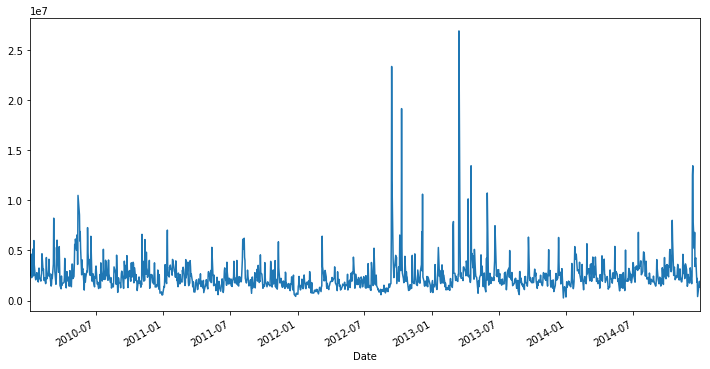

In [251]:
company.plot(figsize=(12,6))

C:\Users\maks_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).mean()



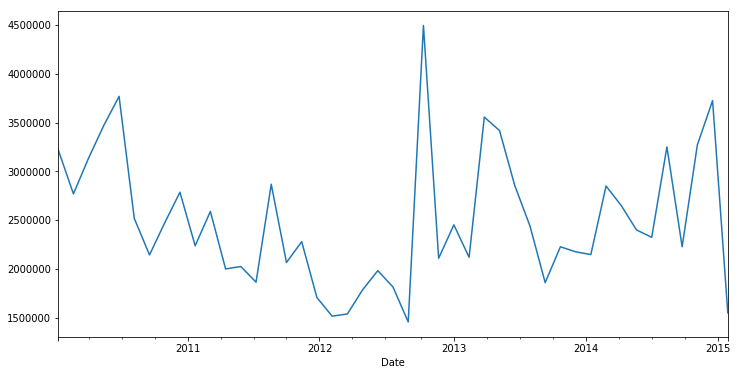

In [252]:
company.resample('6W', how='mean').plot(figsize=(12,6))

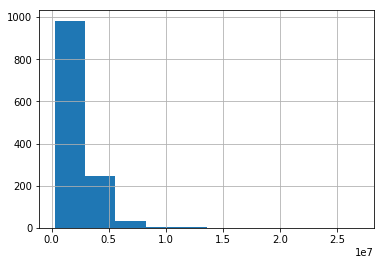

In [253]:
company.hist()

In [254]:
volByYear = DataFrame()
a = company['2010']
a.drop(a.tail(3).index,inplace=True)
volByYear['2010'] = a.values
a = company['2011']
a.drop(a.tail(4).index,inplace=True)
volByYear['2011'] = a.values
a = company['2012']
volByYear['2012'] = a.values
a = company['2013']
a.drop(a.tail(2).index,inplace=True)
volByYear['2013'] = a.values
a = company['2014']
a.drop(a.tail(1).index,inplace=True)
a.shape
volByYear['2014'] = a.values
volByYear

,2010,2011,2012,2013,2014
0,2496013.0,1426376.0,632206.0,2001371.0,1875512.0
1,2700340.0,1330858.0,1417588.0,802652.0,1333141.0
2,3993940.0,2654696.0,1580817.0,1547823.0,1664844.0
3,4633114.0,3589667.0,2412476.0,1370626.0,1950728.0
4,2289556.0,2170179.0,1561995.0,1911342.0,1837218.0
5,2884240.0,1700662.0,1067315.0,3593140.0,1891736.0
6,5160997.0,4110495.0,1199185.0,2723918.0,1546833.0
7,2468904.0,7033006.0,1541233.0,1641004.0,1376794.0
8,5990022.0,2971221.0,1402965.0,1102963.0,1783292.0
9,3583970.0,2544518.0,2141930.0,1452018.0,2071765.0


In [255]:
corr = stats.spearmanr(volByYear)
corr[0]

array([[ 1.        ,  0.173195  ,  0.1063459 ,  0.03422077,  0.00721674],
       [ 0.173195  ,  1.        , -0.02597699, -0.05888468,  0.03375097],
       [ 0.1063459 , -0.02597699,  1.        ,  0.08166494,  0.0669647 ],
       [ 0.03422077, -0.05888468,  0.08166494,  1.        ,  0.15254146],
       [ 0.00721674,  0.03375097,  0.0669647 ,  0.15254146,  1.        ]])

In [256]:
corrUniq = np.zeros(10)
corrUniq[0] = corr[0][0][1]
corrUniq[1] = corr[0][0][1]
corrUniq[2] = corr[0][0][2]
corrUniq[3] = corr[0][0][3]
corrUniq[4] = corr[0][1][2]
corrUniq[5] = corr[0][1][3]
corrUniq[6] = corr[0][1][4]
corrUniq[7] = corr[0][2][3]
corrUniq[8] = corr[0][2][4]
corrUniq[9] = corr[0][3][4]
corrUniq.mean()

0.073701706259049635

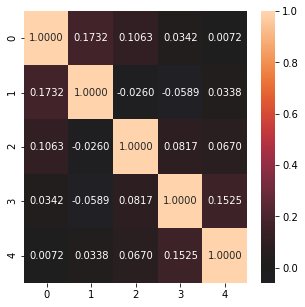

In [257]:
plt.figure(figsize = (5,5))
sns.heatmap(corr[0], annot=True, fmt=".4f", center=0);

In [258]:
corr = stats.spearmanr(volByYear)
corr[1]

array([[ 0.        ,  0.00574313,  0.09142113,  0.58797146,  0.9090616 ],
       [ 0.00574313,  0.        ,  0.68091663,  0.3509285 ,  0.59310919],
       [ 0.09142113,  0.68091663,  0.        ,  0.19542667,  0.28866458],
       [ 0.58797146,  0.3509285 ,  0.19542667,  0.        ,  0.01515999],
       [ 0.9090616 ,  0.59310919,  0.28866458,  0.01515999,  0.        ]])

In [259]:
corrUniq = np.zeros(10)
corrUniq[0] = corr[1][0][1]
corrUniq[1] = corr[1][0][1]
corrUniq[2] = corr[1][0][2]
corrUniq[3] = corr[1][0][3]
corrUniq[4] = corr[1][1][2]
corrUniq[5] = corr[1][1][3]
corrUniq[6] = corr[1][1][4]
corrUniq[7] = corr[1][2][3]
corrUniq[8] = corr[1][2][4]
corrUniq[9] = corr[1][3][4]
corrUniq.mean()

0.28150844057114033

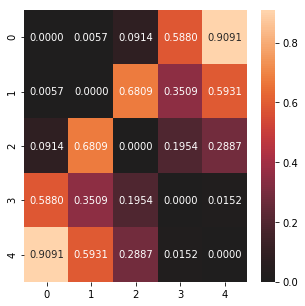

In [260]:
plt.figure(figsize = (5,5))
sns.heatmap(corr[1], annot=True, fmt=".4f", center=0);

In [261]:
statistic = np.zeros(10)
statistic[0] = stats.ks_2samp(volByYear['2010'], volByYear['2011']).statistic
statistic[1] = stats.ks_2samp(volByYear['2010'], volByYear['2012']).statistic
statistic[2] = stats.ks_2samp(volByYear['2010'], volByYear['2013']).statistic
statistic[3] = stats.ks_2samp(volByYear['2010'], volByYear['2014']).statistic
statistic[4] = stats.ks_2samp(volByYear['2011'], volByYear['2012']).statistic
statistic[5] = stats.ks_2samp(volByYear['2011'], volByYear['2013']).statistic
statistic[6] = stats.ks_2samp(volByYear['2011'], volByYear['2014']).statistic
statistic[7] = stats.ks_2samp(volByYear['2012'], volByYear['2013']).statistic
statistic[8] = stats.ks_2samp(volByYear['2012'], volByYear['2014']).statistic
statistic[9] = stats.ks_2samp(volByYear['2013'], volByYear['2014']).statistic
statistic

array([ 0.26086957,  0.39920949,  0.16205534,  0.07509881,  0.22134387,
        0.14229249,  0.256917  ,  0.29644269,  0.41501976,  0.16205534])

In [262]:
statistic.mean()

0.2391304347826087

In [263]:
pvalue = np.zeros(10)
pvalue[0] = stats.ks_2samp(volByYear['2010'], volByYear['2011']).pvalue
pvalue[1] = stats.ks_2samp(volByYear['2010'], volByYear['2012']).pvalue
pvalue[2] = stats.ks_2samp(volByYear['2010'], volByYear['2013']).pvalue
pvalue[3] = stats.ks_2samp(volByYear['2010'], volByYear['2014']).pvalue
pvalue[4] = stats.ks_2samp(volByYear['2011'], volByYear['2012']).pvalue
pvalue[5] = stats.ks_2samp(volByYear['2011'], volByYear['2013']).pvalue
pvalue[6] = stats.ks_2samp(volByYear['2011'], volByYear['2014']).pvalue
pvalue[7] = stats.ks_2samp(volByYear['2012'], volByYear['2013']).pvalue
pvalue[8] = stats.ks_2samp(volByYear['2012'], volByYear['2014']).pvalue
pvalue[9] = stats.ks_2samp(volByYear['2013'], volByYear['2014']).pvalue
pvalue

array([  4.46739668e-08,   2.41972635e-18,   2.23092069e-03,
         4.58660316e-01,   6.20711377e-06,   1.05853848e-02,
         7.58832348e-08,   2.63727025e-10,   8.63921515e-20,
         2.23092069e-03])

In [264]:
pvalue.mean()

0.0473713870408074

In [226]:
ks_results = stats.kstest(company, cdf='norm')
ks_results

KstestResult(statistic=0.47309444678001966, pvalue=0.0)

All needed

In [18]:
needNames = ["UG.PA", "RNO.PA", "AIR.PA", "LR.PA", "SAF.PA", "SU.PA", "SOLB.BR", "AI.PA", "OR.PA", "BN.PA", "SW.PA"]
for name in needNames:
    print("\n", name)
    company = dataVol[name]
    print("Анализ на независимость:")
    volByYear = DataFrame()
    a = company['2010']
    a.drop(a.tail(3).index,inplace=True)
    volByYear['2010'] = a.values
    a = company['2011']
    a.drop(a.tail(4).index,inplace=True)
    volByYear['2011'] = a.values
    a = company['2012']
    volByYear['2012'] = a.values
    a = company['2013']
    a.drop(a.tail(2).index,inplace=True)
    volByYear['2013'] = a.values
    a = company['2014']
    a.drop(a.tail(1).index,inplace=True)
    volByYear['2014'] = a.values
    corr = stats.spearmanr(volByYear)
    corrUniq = np.zeros(10)
    corrUniq[0] = corr[0][0][1]
    corrUniq[1] = corr[0][0][1]
    corrUniq[2] = corr[0][0][2]
    corrUniq[3] = corr[0][0][3]
    corrUniq[4] = corr[0][1][2]
    corrUniq[5] = corr[0][1][3]
    corrUniq[6] = corr[0][1][4]
    corrUniq[7] = corr[0][2][3]
    corrUniq[8] = corr[0][2][4]
    corrUniq[9] = corr[0][3][4]
    print("\tЗначение ранговой корреляции = ", corrUniq.mean())
    q = corrUniq.mean()
    corrUniq = np.zeros(10)
    corrUniq[0] = corr[1][0][1]
    corrUniq[1] = corr[1][0][1]
    corrUniq[2] = corr[1][0][2]
    corrUniq[3] = corr[1][0][3]
    corrUniq[4] = corr[1][1][2]
    corrUniq[5] = corr[1][1][3]
    corrUniq[6] = corr[1][1][4]
    corrUniq[7] = corr[1][2][3]
    corrUniq[8] = corr[1][2][4]
    corrUniq[9] = corr[1][3][4]
    print("\tP-value = ", corrUniq.mean())
    w = corrUniq.mean()
    print(q, "(", w, ")")
    print("Проверка на одинаковую распределенность:")
    statistic = np.zeros(10)
    statistic[0] = stats.ks_2samp(volByYear['2010'], volByYear['2011']).statistic
    statistic[1] = stats.ks_2samp(volByYear['2010'], volByYear['2012']).statistic
    statistic[2] = stats.ks_2samp(volByYear['2010'], volByYear['2013']).statistic
    statistic[3] = stats.ks_2samp(volByYear['2010'], volByYear['2014']).statistic
    statistic[4] = stats.ks_2samp(volByYear['2011'], volByYear['2012']).statistic
    statistic[5] = stats.ks_2samp(volByYear['2011'], volByYear['2013']).statistic
    statistic[6] = stats.ks_2samp(volByYear['2011'], volByYear['2014']).statistic
    statistic[7] = stats.ks_2samp(volByYear['2012'], volByYear['2013']).statistic
    statistic[8] = stats.ks_2samp(volByYear['2012'], volByYear['2014']).statistic
    statistic[9] = stats.ks_2samp(volByYear['2013'], volByYear['2014']).statistic
    print("\tЗначение статистики = ", statistic.mean())
    pvalue = np.zeros(10)
    pvalue[0] = stats.ks_2samp(volByYear['2010'], volByYear['2011']).pvalue
    pvalue[1] = stats.ks_2samp(volByYear['2010'], volByYear['2012']).pvalue
    pvalue[2] = stats.ks_2samp(volByYear['2010'], volByYear['2013']).pvalue
    pvalue[3] = stats.ks_2samp(volByYear['2010'], volByYear['2014']).pvalue
    pvalue[4] = stats.ks_2samp(volByYear['2011'], volByYear['2012']).pvalue
    pvalue[5] = stats.ks_2samp(volByYear['2011'], volByYear['2013']).pvalue
    pvalue[6] = stats.ks_2samp(volByYear['2011'], volByYear['2014']).pvalue
    pvalue[7] = stats.ks_2samp(volByYear['2012'], volByYear['2013']).pvalue
    pvalue[8] = stats.ks_2samp(volByYear['2012'], volByYear['2014']).pvalue
    pvalue[9] = stats.ks_2samp(volByYear['2013'], volByYear['2014']).pvalue
    print("\tP-value = ", pvalue.mean())
    print(statistic.mean(), "(", pvalue.mean(), ")")


 UG.PA
Анализ на независимость:
	Значение ранговой корреляции =  -0.00345668628468
	P-value =  0.453828133637
-0.00345668628468 ( 0.453828133637 )
Проверка на одинаковую распределенность:
	Значение статистики =  0.371146245059
	P-value =  0.0334669161832
0.371146245059 ( 0.0334669161832 )

 RNO.PA
Анализ на независимость:
	Значение ранговой корреляции =  0.108080091767
	P-value =  0.217356258305
0.108080091767 ( 0.217356258305 )
Проверка на одинаковую распределенность:
	Значение статистики =  0.432411067194
	P-value =  0.0159868128128
0.432411067194 ( 0.0159868128128 )

 AIR.PA
Анализ на независимость:
	Значение ранговой корреляции =  0.073701706259
	P-value =  0.281508440571
0.073701706259 ( 0.281508440571 )
Проверка на одинаковую распределенность:
	Значение статистики =  0.239130434783
	P-value =  0.0473713870408
0.239130434783 ( 0.0473713870408 )

 LR.PA
Анализ на независимость:
	Значение ранговой корреляции =  0.0371580775723
	P-value =  0.356800304213
0.0371580775723 ( 0.35680030

In [147]:
# company = dataProb["BN.PA"]
company = dataVol["BN.PA"]
a = stats.normaltest(company)
print(round(a.statistic, 5), a.pvalue)

584.01509 1.52312077641e-127


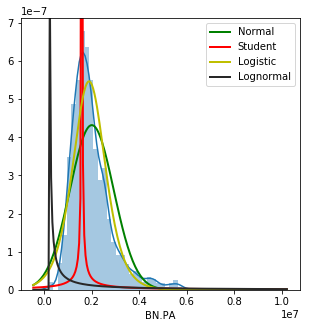

In [261]:
#company = dataProb["UG.PA"]
company = dataVol["BN.PA"]
plt.figure(figsize = (5,5))
sns.distplot(company)
# mean = company.mean()
# std = company.std()
sns.distplot(company, fit=norm, kde=False, hist = False, fit_kws = {"color": "g", "lw": 2, "label": "Normal"})
sns.distplot(company, fit=stud, kde=False, hist = False, fit_kws = {"color": "r", "lw": 2, "label": "Student"})
sns.distplot(company, fit=logistic, kde=False, hist = False, fit_kws = {"color": "y", "lw": 2, "label": "Logistic"})
sns.distplot(company, fit=lognorm, kde=False, hist = False, fit_kws = {"lw": 2, "label": "Lognormal"})
plt.legend()


### Функция для анализа всех компаний по *доходностям*

In [395]:
def analisysProb(companyName):
    print("\n",companyName)
    company = dataProb[companyName]
    probByYear = DataFrame()
    a = company['2010']
    a.drop(a.head(1).index,inplace=True)
    probByYear['2010'] = a.values
    a = company['2011']
    a.drop(a.head(3).index,inplace=True)
    probByYear['2011'] = a.values
    a = company['2012']
    probByYear['2012'] = a.values
    a = company['2013']
    a.drop(a.head(1).index,inplace=True)
    probByYear['2013'] = a.values
    a = company['2014']
    a.drop(a.head(2).index,inplace=True)
    probByYear['2014'] = a.values
    print("Проверка на независимость:")
    corr = probByYear.corr(method='pearson')
    corrUniq = np.zeros(10)
    corrUniq[0] = corr['2010']['2011']
    corrUniq[1] = corr['2010']['2012']
    corrUniq[2] = corr['2010']['2013']
    corrUniq[3] = corr['2010']['2014']
    corrUniq[4] = corr['2011']['2012']
    corrUniq[5] = corr['2011']['2013']
    corrUniq[6] = corr['2011']['2014']
    corrUniq[7] = corr['2012']['2013']
    corrUniq[8] = corr['2012']['2014']
    corrUniq[9] = corr['2013']['2014']
    print("\tcorr mean = ", corrUniq.mean())
    print("Проверка на одинаковую распределенность:")
    statistic = np.zeros(10)
    statistic[0] = stats.ks_2samp(probByYear['2010'], probByYear['2011']).statistic
    statistic[1] = stats.ks_2samp(probByYear['2010'], probByYear['2012']).statistic
    statistic[2] = stats.ks_2samp(probByYear['2010'], probByYear['2013']).statistic
    statistic[3] = stats.ks_2samp(probByYear['2010'], probByYear['2014']).statistic
    statistic[4] = stats.ks_2samp(probByYear['2011'], probByYear['2012']).statistic
    statistic[5] = stats.ks_2samp(probByYear['2011'], probByYear['2013']).statistic
    statistic[6] = stats.ks_2samp(probByYear['2011'], probByYear['2014']).statistic
    statistic[7] = stats.ks_2samp(probByYear['2012'], probByYear['2013']).statistic
    statistic[8] = stats.ks_2samp(probByYear['2012'], probByYear['2014']).statistic
    statistic[9] = stats.ks_2samp(probByYear['2013'], probByYear['2014']).statistic
    print("\tstatistic = ", statistic.mean())
    pvalue = np.zeros(10)
    pvalue[0] = stats.ks_2samp(probByYear['2010'], probByYear['2011']).pvalue
    pvalue[1] = stats.ks_2samp(probByYear['2010'], probByYear['2012']).pvalue
    pvalue[2] = stats.ks_2samp(probByYear['2010'], probByYear['2013']).pvalue
    pvalue[3] = stats.ks_2samp(probByYear['2010'], probByYear['2014']).pvalue
    pvalue[4] = stats.ks_2samp(probByYear['2011'], probByYear['2012']).pvalue
    pvalue[5] = stats.ks_2samp(probByYear['2011'], probByYear['2013']).pvalue
    pvalue[6] = stats.ks_2samp(probByYear['2011'], probByYear['2014']).pvalue
    pvalue[7] = stats.ks_2samp(probByYear['2012'], probByYear['2013']).pvalue
    pvalue[8] = stats.ks_2samp(probByYear['2012'], probByYear['2014']).pvalue
    pvalue[9] = stats.ks_2samp(probByYear['2013'], probByYear['2014']).pvalue
    print("\tp-value = ", pvalue.mean())
    print("Тест Колмогорова-Смирнова:")
    ks_results = stats.kstest(company, cdf='norm')
    print("\tstatistic = ", ks_results.statistic)
    print("\tp=value = ", ks_results.pvalue)
    print("Тест на распределение Стьюдента:")
    a = np.random.standard_t(1, size=254)
    print("\tp=value = ", tt(company, a).pvalue)

In [396]:
names = dataProb.columns
names

Index(['ACA.PA', 'AF.PA', 'AI.PA', 'AIR.PA', 'ALO.PA', 'ALT.PA', 'BN.PA',
       'BNP.PA', 'CNP.PA', 'CS.PA', 'DG.PA', 'FP.PA', 'GLE.PA', 'ING.PA',
       'KN.PA', 'LI.PA', 'LR.PA', 'MAU.PA', 'ORA.PA', 'RNO.PA', 'RXL.PA',
       'SAF.PA', 'SCR.PA', 'SEV.PA', 'STM.PA', 'SU.PA', 'UG.PA', 'VIE.PA',
       'VIV.PA', 'VK.PA', 'ZC.PA'],
      dtype='object')

In [397]:
for name in names:
    analisysProb(name)


 ACA.PA
Проверка на независимость:
	corr mean =  -0.0207662861554
Проверка на одинаковую распределенность:
	statistic =  0.122047244094
	p-value =  0.160645500517
Тест Колмогорова-Смирнова:
	statistic =  0.461905936926
	p=value =  0.0
Тест на распределение Стьюдента:
	p=value =  0.00107818229557

 AF.PA
Проверка на независимость:
	corr mean =  -0.0211519224104
Проверка на одинаковую распределенность:
	statistic =  0.100787401575
	p-value =  0.202827715149
Тест Колмогорова-Смирнова:
	statistic =  0.463553905031
	p=value =  0.0
Тест на распределение Стьюдента:
	p=value =  0.0271974244221

 AI.PA
Проверка на независимость:
	corr mean =  0.00410519121053
Проверка на одинаковую распределенность:
	statistic =  0.0842519685039
	p-value =  0.432989747223
Тест Колмогорова-Смирнова:
	statistic =  0.483640888202
	p=value =  0.0
Тест на распределение Стьюдента:
	p=value =  0.408156136492

 AIR.PA
Проверка на независимость:
	corr mean =  0.00856870450387
Проверка на одинаковую распределенность:
	s

In [362]:
analisysProb("DG.PA")


 DG.PA
Проверка на независимость:
	corr mean =  -0.00607914942995
Проверка на одинаковую распределенность:
	statistic =  0.106299212598
	p-value =  0.230337698742
Тест Колмогорова-Смирнова:
	statistic =  0.475583944218
	p=value =  0.0


In [363]:
analisysProb("ING.PA")


 ING.PA
Проверка на независимость:
	corr mean =  -0.00361786407132
Проверка на одинаковую распределенность:
	statistic =  0.0925196850394
	p-value =  0.332382725545
Тест Колмогорова-Смирнова:
	statistic =  0.477103382192
	p=value =  0.0


In [364]:
analisysProb("SEV.PA")


 SEV.PA
Проверка на независимость:
	corr mean =  0.0080358114879
Проверка на одинаковую распределенность:
	statistic =  0.102755905512
	p-value =  0.222716177116
Тест Колмогорова-Смирнова:
	statistic =  0.476944311791
	p=value =  0.0


In [380]:
from scipy.stats import ttest_ind as tt



0.31662271694221888

### Функция для анализа всех компаний по *объему продаж*

In [398]:
def analisysVol(companyName):
    print("\n",companyName)
    company = dataVol[companyName]
    volByYear = DataFrame()
    a = company['2010']
    a.drop(a.head(2).index,inplace=True)
    volByYear['2010'] = a.values
    a = company['2011']
    a.drop(a.head(3).index,inplace=True)
    volByYear['2011'] = a.values
    a = company['2012']
    volByYear['2012'] = a.values
    a = company['2013']
    a.drop(a.head(1).index,inplace=True)
    volByYear['2013'] = a.values
    a = company['2014']
    a.drop(a.head(2).index,inplace=True)
    volByYear['2014'] = a.values
    print("Проверка на независимость:")
    corrVol = volByYear.corr(method='pearson')
    corrUniq = np.zeros(10)
    corrUniq[0] = corrVol['2010']['2011']
    corrUniq[1] = corrVol['2010']['2012']
    corrUniq[2] = corrVol['2010']['2013']
    corrUniq[3] = corrVol['2010']['2014']
    corrUniq[4] = corrVol['2011']['2012']
    corrUniq[5] = corrVol['2011']['2013']
    corrUniq[6] = corrVol['2011']['2014']
    corrUniq[7] = corrVol['2012']['2013']
    corrUniq[8] = corrVol['2012']['2014']
    corrUniq[9] = corrVol['2013']['2014']
    print("\tcorr mean = ", corrUniq.mean())
    print("Проверка на одинаковую распределенность:")
    statistic = np.zeros(10)
    statistic[0] = stats.ks_2samp(volByYear['2010'], volByYear['2011']).statistic
    statistic[1] = stats.ks_2samp(volByYear['2010'], volByYear['2012']).statistic
    statistic[2] = stats.ks_2samp(volByYear['2010'], volByYear['2013']).statistic
    statistic[3] = stats.ks_2samp(volByYear['2010'], volByYear['2014']).statistic
    statistic[4] = stats.ks_2samp(volByYear['2011'], volByYear['2012']).statistic
    statistic[5] = stats.ks_2samp(volByYear['2011'], volByYear['2013']).statistic
    statistic[6] = stats.ks_2samp(volByYear['2011'], volByYear['2014']).statistic
    statistic[7] = stats.ks_2samp(volByYear['2012'], volByYear['2013']).statistic
    statistic[8] = stats.ks_2samp(volByYear['2012'], volByYear['2014']).statistic
    statistic[9] = stats.ks_2samp(volByYear['2013'], volByYear['2014']).statistic
    print("\tstatistic = ", statistic.mean())
    pvalue = np.zeros(10)
    pvalue[0] = stats.ks_2samp(volByYear['2010'], volByYear['2011']).pvalue
    pvalue[1] = stats.ks_2samp(volByYear['2010'], volByYear['2012']).pvalue
    pvalue[2] = stats.ks_2samp(volByYear['2010'], volByYear['2013']).pvalue
    pvalue[3] = stats.ks_2samp(volByYear['2010'], volByYear['2014']).pvalue
    pvalue[4] = stats.ks_2samp(volByYear['2011'], volByYear['2012']).pvalue
    pvalue[5] = stats.ks_2samp(volByYear['2011'], volByYear['2013']).pvalue
    pvalue[6] = stats.ks_2samp(volByYear['2011'], volByYear['2014']).pvalue
    pvalue[7] = stats.ks_2samp(volByYear['2012'], volByYear['2013']).pvalue
    pvalue[8] = stats.ks_2samp(volByYear['2012'], volByYear['2014']).pvalue
    pvalue[9] = stats.ks_2samp(volByYear['2013'], volByYear['2014']).pvalue    
    print("\tp-value = ", pvalue.mean())
    print("Тест Колмогорова-Смирнова:")
    ks_results = stats.kstest(company, cdf='norm')
    print("\tstatistic = ", ks_results.statistic)
    print("\tp=value = ", ks_results.pvalue)
    print("Тест на распределение Стьюдента:")
    a = np.random.standard_t(1, size=254)
    print("\tp=value = ", tt(company, a).pvalue)

In [399]:
names = dataVol.columns
names

Index(['ACA.PA', 'AF.PA', 'AI.PA', 'AIR.PA', 'ALO.PA', 'ALT.PA', 'BN.PA',
       'BNP.PA', 'BOL.PA', 'CNP.PA', 'CS.PA', 'DG.PA', 'FP.PA', 'GLE.PA',
       'ING.PA', 'KN.PA', 'LI.PA', 'LR.PA', 'MAU.PA', 'ORA.PA', 'RNO.PA',
       'RXL.PA', 'SAF.PA', 'SCR.PA', 'SEV.PA', 'STM.PA', 'SU.PA', 'UG.PA',
       'VIE.PA', 'VIV.PA', 'VK.PA', 'ZC.PA'],
      dtype='object')

In [400]:
for name in names:
    analisysVol(name)


 ACA.PA
Проверка на независимость:
	corr mean =  0.00713440874082
Проверка на одинаковую распределенность:
	statistic =  0.379921259843
	p-value =  0.00334961010706
Тест Колмогорова-Смирнова:
	statistic =  0.999217527387
	p=value =  0.0
Тест на распределение Стьюдента:
	p=value =  6.2617097971e-118

 AF.PA
Проверка на независимость:
	corr mean =  0.0394050249683
Проверка на одинаковую распределенность:
	statistic =  0.254724409449
	p-value =  0.105644915809
Тест Колмогорова-Смирнова:
	statistic =  0.999217527387
	p=value =  0.0
Тест на распределение Стьюдента:
	p=value =  2.93878910862e-139

 AI.PA
Проверка на независимость:
	corr mean =  0.0122656818788
Проверка на одинаковую распределенность:
	statistic =  0.316929133858
	p-value =  0.0325685334729
Тест Колмогорова-Смирнова:
	statistic =  0.999217527387
	p=value =  0.0
Тест на распределение Стьюдента:
	p=value =  6.99692432465e-200

 AIR.PA
Проверка на независимость:
	corr mean =  0.00744100383977
Проверка на одинаковую распределенн

	p-value =  0.253802690839
Тест Колмогорова-Смирнова:
	statistic =  0.999217527387
	p=value =  0.0
Тест на распределение Стьюдента:
	p=value =  2.47181370608e-111

 ZC.PA
Проверка на независимость:
	corr mean =  0.108401941326
Проверка на одинаковую распределенность:
	statistic =  0.366141732283
	p-value =  0.00676956626362
Тест Колмогорова-Смирнова:
	statistic =  0.999217527387
	p=value =  0.0
Тест на распределение Стьюдента:
	p=value =  1.08828452091e-90


# Исследование зависимости между активами

### 'RNO.PA' и 'UG.PA' 

Корреляция

In [292]:
company1 = dataProb['SW.PA']
company2 = dataProb['SAF.PA']
a = stats.pearsonr(company1, company2)
print(round(a[0], 5), a[1])

0.43618 2.3563936782e-60


In [515]:
np.corrcoef(company1, company2)[0][1]

0.33117017308664326

Линейная регрессия

0.01791 0.41881


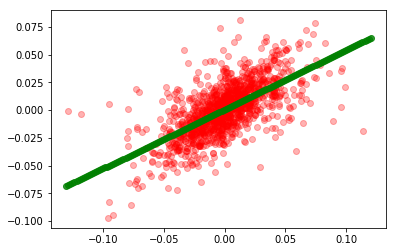

In [69]:
company1 = dataProb['UG.PA']
company2 = dataProb['RNO.PA']
company1_New = []
for n in company1:
    company1_New.append([n])
regressionModel = linear_model.LinearRegression()
regressionModel.fit(company1_New, company2)
regressionModel.coef_[0]
corX = np.linspace(-0.13, 0.12, 150)
corXNew = []
for n in corX:
    corXNew.append([n])
corY = regressionModel.predict(corXNew)
plt.plot(company1, company2, 'o', alpha = 0.3, color="red");
plt.plot(corX, corY, 'o', alpha = 0.8, color="green");
predictedCompany2 = regressionModel.predict(company1_New)
coef = r2_score(company2, predictedCompany2)
err = RMSE(company2, predictedCompany2)
print(round(err, 5), round(coef, 5))

In [516]:
company1_New = []
for n in company1:
    company1_New.append([n])

In [48]:
def RMSE(trueY, predictedY):
    return np.sqrt(mean_squared_error(trueY, predictedY))

In [518]:
regressionModel = linear_model.LinearRegression()
regressionModel.fit(company1_New, company2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Оценка качества регрессии

In [519]:
predictedCompany2 = regressionModel.predict(company1_New)
coef = r2_score(company2, predictedCompany2)
err = RMSE(company2, predictedCompany2)
print(coef)
print(err)

0.109673683542
0.0154466136034


In [522]:
regressionModel.coef_[0]
corX = np.linspace(-0.12, 0.09, 150)
corXNew = []
for n in corX:
    corXNew.append([n])
corY = regressionModel.predict(corXNew)

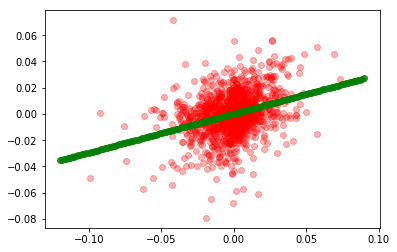

In [523]:
plt.plot(company1, company2, 'o', alpha = 0.3, color="red");
plt.plot(corX, corY, 'o', alpha = 0.8, color="green");

Таблица сопряженности признаков, тест Хи-квадрат

In [81]:
company1 = dataProb['LR.PA']
company2 = dataProb['SU.PA']
a = crosstab(company1, company2)
colsum = a.sum(axis=0)
colpct = a/colsum
cs1 = stats.chi2_contingency(a)
# chi-square value, p-value
print(cs1[0], round(cs1[1], 5))

1597575.0 0.26112


Между доходностью и объемом продаж одного актива

Корреляция

In [288]:
dataVol.drop(dataVol.head(1).index,inplace=True)
dataVol.drop(dataVol.head(1).index,inplace=True)
dataVol.drop(dataVol.head(1).index,inplace=True)

In [295]:
com = "UG.PA"
prob = dataProb[com]
vol = dataVol[com]
vol.shape
a = stats.spearmanr(prob, vol)
print(round(a[0], 5), a[1])

-0.01592 0.570138747022


In [131]:
com = "BN.PA"
prob = dataProb[com].values
vol = dataVol[com].values
a = crosstab(prob, vol)
colsum = a.sum(axis=0)
colpct = a/colsum
cs1 = stats.chi2_contingency(a)
# chi-square value, p-value
print(cs1[0], round(cs1[1],5 ))

1612875.0 0.2429


In [285]:
np.corrcoef(prob, vol)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

Линейная регрессия

922170.972506 0.00229689733252


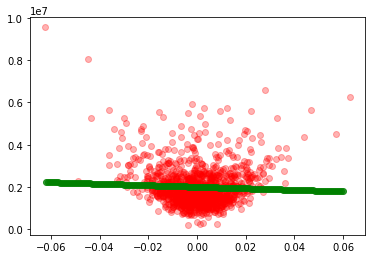

In [124]:
com = "BN.PA"
prob = dataProb[com].values
vol = dataVol[com].values
prob_New = []
for n in prob:
    prob_New.append([n])
regressionModel = linear_model.LinearRegression()
regressionModel.fit(prob_New, vol)
regressionModel.coef_[0]
corX = np.linspace(-0.062, 0.06, 150)
corXNew = []
for n in corX:
    corXNew.append([n])
corY = regressionModel.predict(corXNew)
plt.plot(prob, vol, 'o', alpha = 0.3, color="red");
plt.plot(corX, corY, 'o', alpha = 0.8, color="green");
predictedVol = regressionModel.predict(prob_New)
coef = r2_score(vol, predictedVol)
err = RMSE(vol, predictedVol)
print(err, coef)

In [583]:
prob_New = []
for n in prob:
    prob_New.append([n])

In [108]:
def RMSE(trueY, predictedY):
    return np.sqrt(mean_squared_error(trueY, predictedY))

In [585]:
regressionModel = linear_model.LinearRegression()
regressionModel.fit(prob_New, vol)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Оценка качества регрессии

In [586]:
predictedVol = regressionModel.predict(prob_New)
coef = r2_score(vol, predictedVol)
err = RMSE(vol, predictedVol)
print(coef)
print(err)

0.00170877935405
241278.593698


In [589]:
regressionModel.coef_[0]
corX = np.linspace(-0.12, 0.08, 150)
corXNew = []
for n in corX:
    corXNew.append([n])
corY = regressionModel.predict(corXNew)

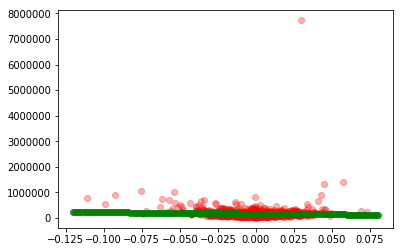

In [592]:
plt.plot(prob, vol, 'o', alpha = 0.3, color="red");
plt.plot(corX, corY, 'o', alpha = 0.8, color="green");

Таблица сопряженности признаков, тест Хи-квадрат